# Lab 5: A 2-dimensional classification problem
In this session we will work with a set of data points in a 2-D plane. The task is to classify the points based on their coordinates and assign them to two different categories. The two categories are indicated with an integer with values 0 and 1. Each point on the plane belongs to a unique category.

The goal of the classification algorithm is to define a *prediction function* that predicts the category of a point based on its coordinates. The accuracy of our prediction is the ratio between the number of times we get the correct result and the total number of points.

In first part, we define the dataset and separate the categories in a simple way by drawing a straight line on the plane. 

In the second part we use a neural network with one layer to find a more accurate solution

### Import statements

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


### Helper functions
These two helper functions are used throughout the project. The input argument is a prediction function (*pred_func*). 
*pred_func* is a function that takes an array of points and returns an array of 0 and 1 based on the prediction. Examples are provided below.


In [2]:
# Helper function to plot a decision boundary.
# Input: pred_func. A function defined that operates on an array of points. 
#                   pred_func is expected to return an array of 0 and 1 
#                   for each point passed in the input array a 0 or 1 is returned based on the condition
#                   in the function

# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
    
# Helper function to calculate how often we get the prediction right
# This is the accuracy of our classification e.g. N_right/N_tot
def accuracy(pred_func, X, y):
    yhat=pred_func(X)
    return 1.-np.count_nonzero(yhat-y)/len(y) 

## Part 1: Prepare dataset and simple classification

### Dataset preparation
Data points are generated using the *generate_data* function below. This function is used to generate a new dataset with random points. 

For the exercise today, we generate the points ourselves using a random function. In a real data science application, we would normally read the points from an input file. This will be the case later in the semester. 

You should **NOT** modify this function. 

In [3]:
# This cell contains the code to prepare the datasets (Do NOT modify this code)
# It uses sklearn.make_moons that generate sets of data sets to train and test classification algorithms
import sklearn
import sklearn.datasets
import sklearn.linear_model

# Generate a dataset and plot it
#     Npoints is the number of points in the dataset
#     rndm is a random seed so different datasets can be generated
#     noise is a parameter controlling how much points are scattered
def generate_data(Npoints,rndm=0,noise=0.20):
    np.random.seed(rndm)
    X, y = sklearn.datasets.make_moons(Npoints, noise=noise)
    return X,y

X= [[ 0.30240233  0.89623817]
 [-0.38598275  0.48730979]
 [ 0.19020931  0.11325428]
 [ 1.71457157 -0.11033049]
 [ 1.96706272 -0.5158008 ]
 [ 1.37332758  0.26614353]
 [ 0.19664576 -0.31794913]
 [ 2.09079968  0.3509453 ]
 [-0.82780203  1.3196502 ]
 [-0.37398915  1.14007928]]
y= [0 1 1 1 1 0 1 1 0 0]


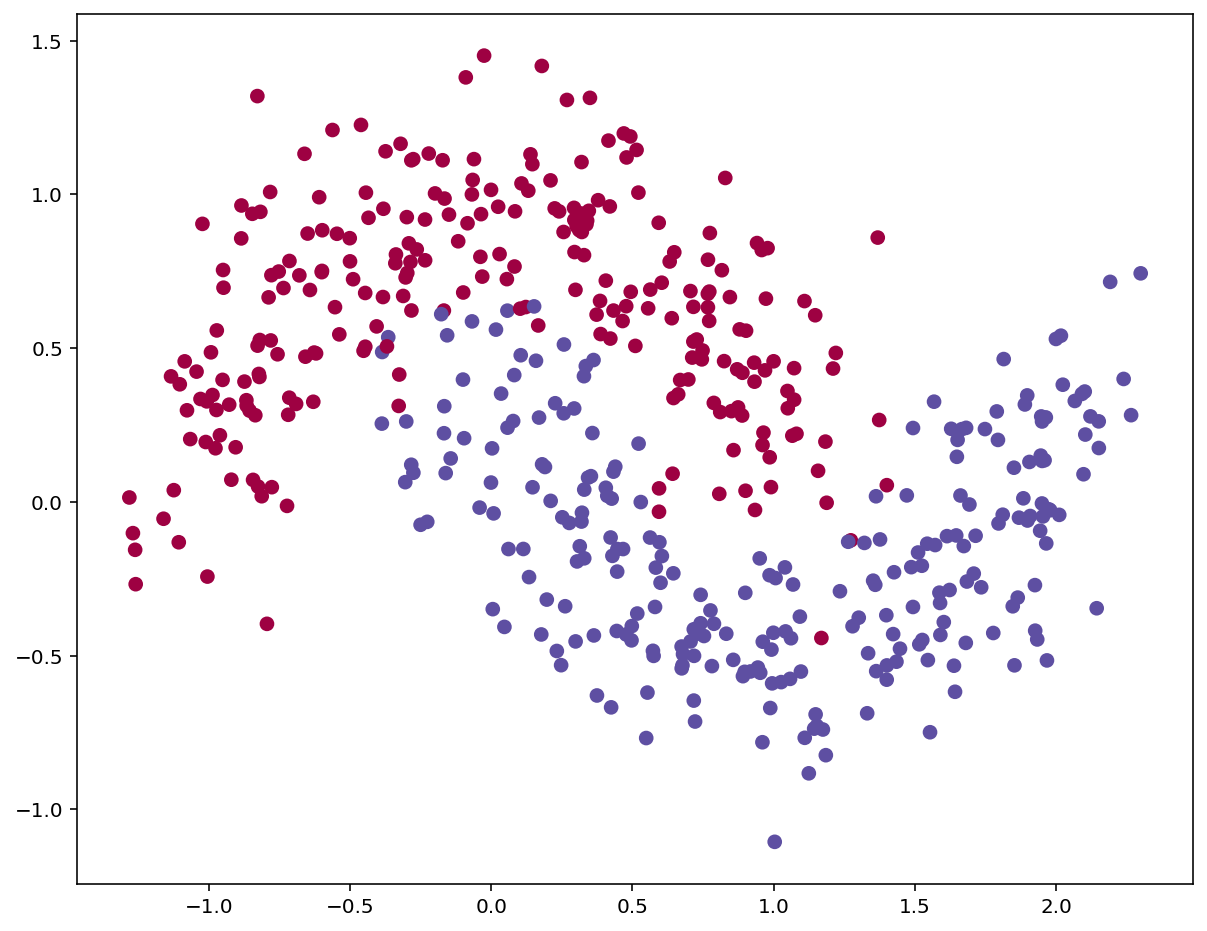

In [4]:
# Generate a dataset and plot it
# We generate a new dataset with 500 points and the default settings for the noise
X_test500,y_test500=generate_data(500)

# Plot the data
plt.scatter(X_test500[:,0], X_test500[:,1], s=40, c=y_test500, cmap=plt.cm.Spectral) #1 is blue, 0 is red

# Print the data (first 10 elements)
print("X=",X_test500[:10,:])
print("y=",y_test500[:10])

### Making a prediction and plotting a boundary 


Accuracy= 0.796


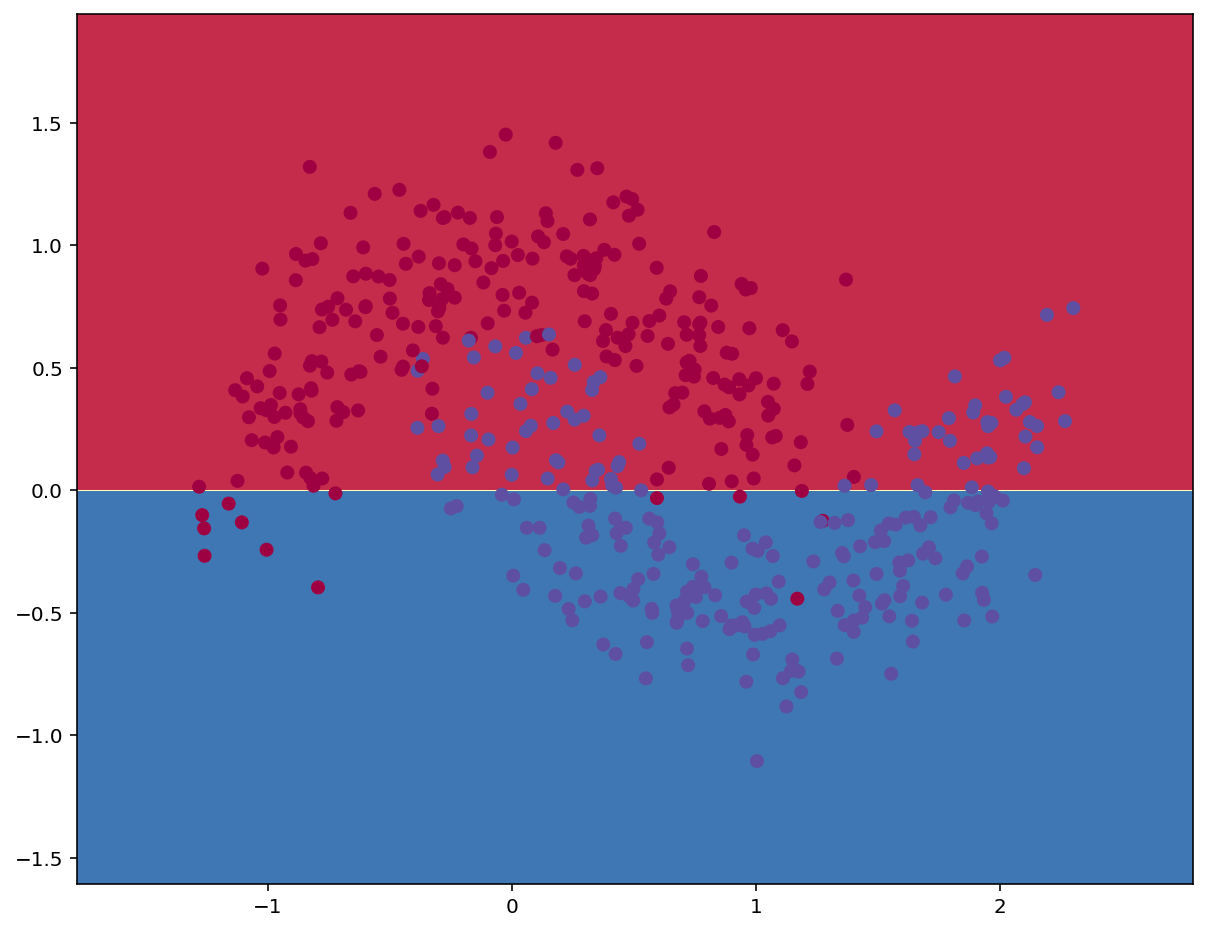

In [5]:
# Here we show how a boundary can be defined and plotted

# First a simple function of X to illustrate the mechanism. 
# In this example we define a prediction that all points above 0 on the vertical axis belong to category 0
def simplePred(x):
    return np.where(x[:,1]>0., 0, 1)

plot_decision_boundary(simplePred,X_test500,y_test500)

# Calculate the accuracy of this predition
print("Accuracy=",accuracy(simplePred,X_test500,y_test500))


Accuracy 0.5680000000000001


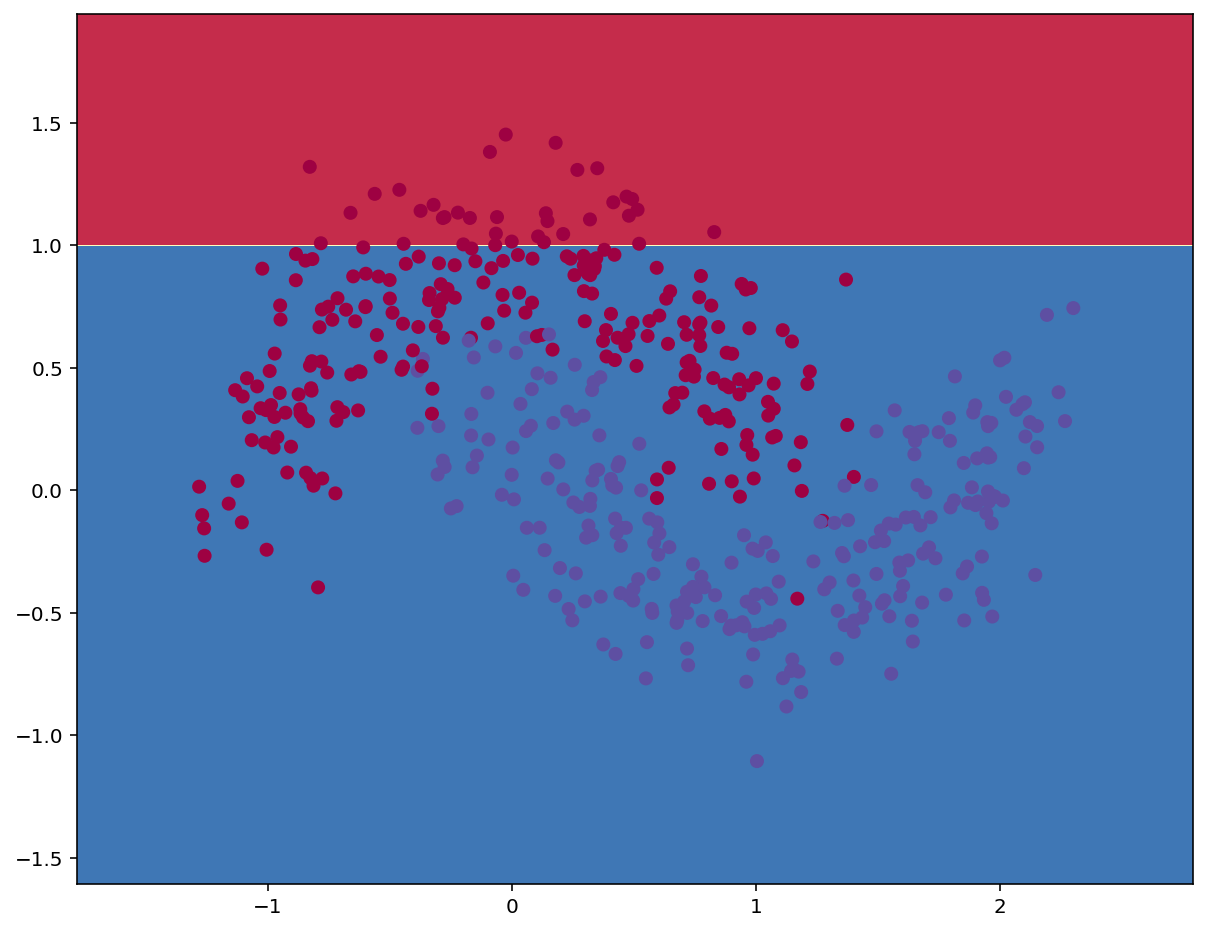

In [6]:
# The example above is impractical, as if we want to use a different classification 
# (eg points above 1.0 are assigned to category 0) we need to write a new function.

# A simple way to separate the two categories
def predConst(x,C):
    return np.where(x[:,1]>C, 0, 1)

# Use lambda to turn the function into a function of just x
plot_decision_boundary(lambda x: predConst(x,1.0),X_test500,y_test500)
print("Accuracy",accuracy(lambda x: predConst(x,1.0), X_test500,y_test500 ) )


### Exercise 1. Optimise the constant prediction
Loop over a value of C in the range (-1:1) in steps of 0.01 and find the value with the highest accuracy. Plot the decision boundary for this value

0.848
128
0.28000000000000114


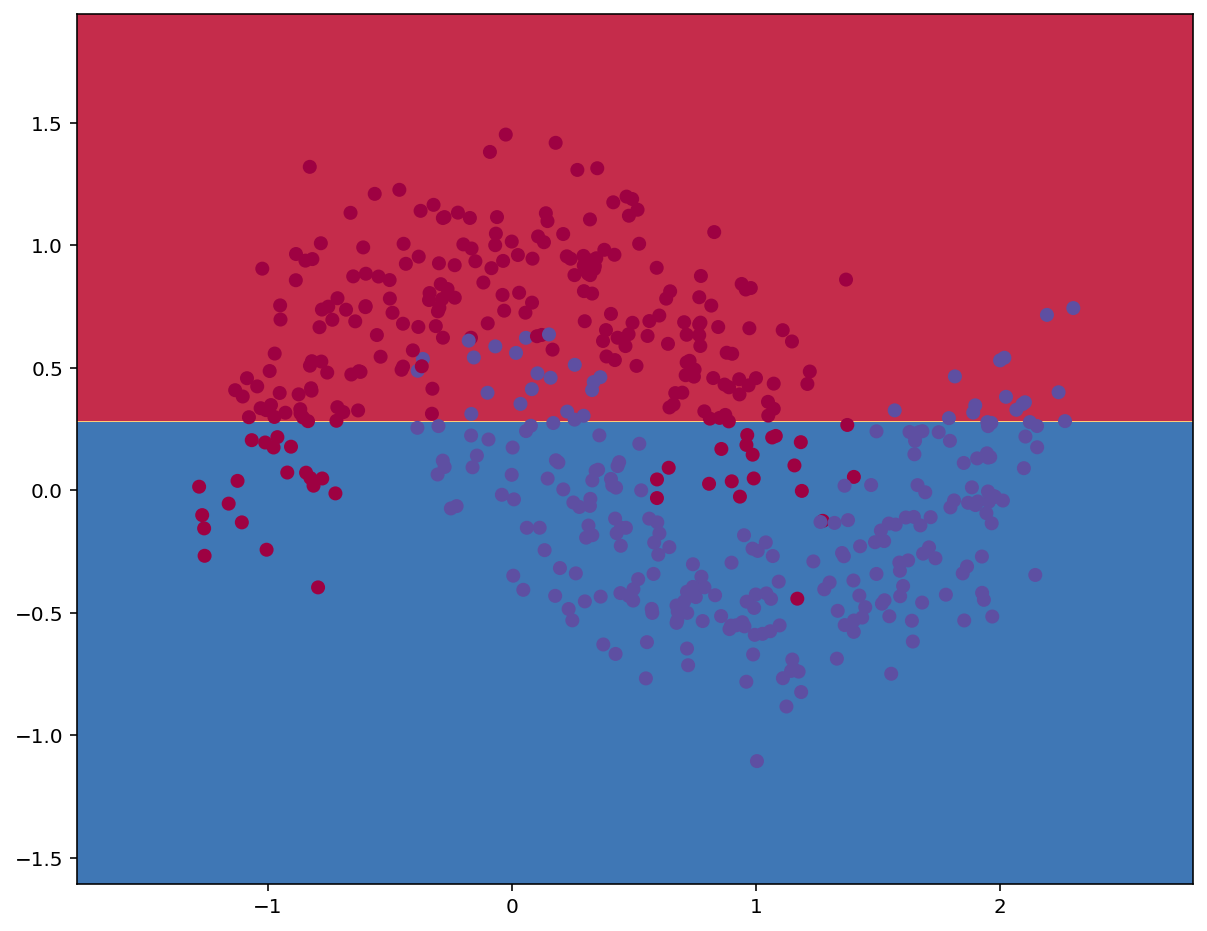

In [7]:
#create array for C values
Cvalues=np.arange(-1,1.01,0.01)
#empty list for accuracy values
avalues=[]*len(Cvalues)

#loop over c values and add accuracy value for each to empty list
for c in Cvalues:
    avalues.append(accuracy(lambda x: predConst(x,c), X_test500,y_test500))

#maximum accuracy from array
maxc = max(avalues)
print(maxc)

#index of max accuracy in array
index = np.argmax(avalues)
print(index)

#corresponding c value for max accuracy
cmax = Cvalues[int(index)]
print(cmax)

#plot boundary with maximum cvalue
plot_decision_boundary(lambda x: predConst(x,cmax),X_test500,y_test500)

### Exercise 2: Train a linear model
Write a predLinear function that takes two arguments and separates the plane usign a straight line (a*x+b). The points above corresponds to category 0 and those below to category 1

Scan the parameters a and b and find the values that yield the highest accuracy. Print the values of a and b and plot the boundary graph. 

0.876
0.2763819095477391
0.007537688442210921


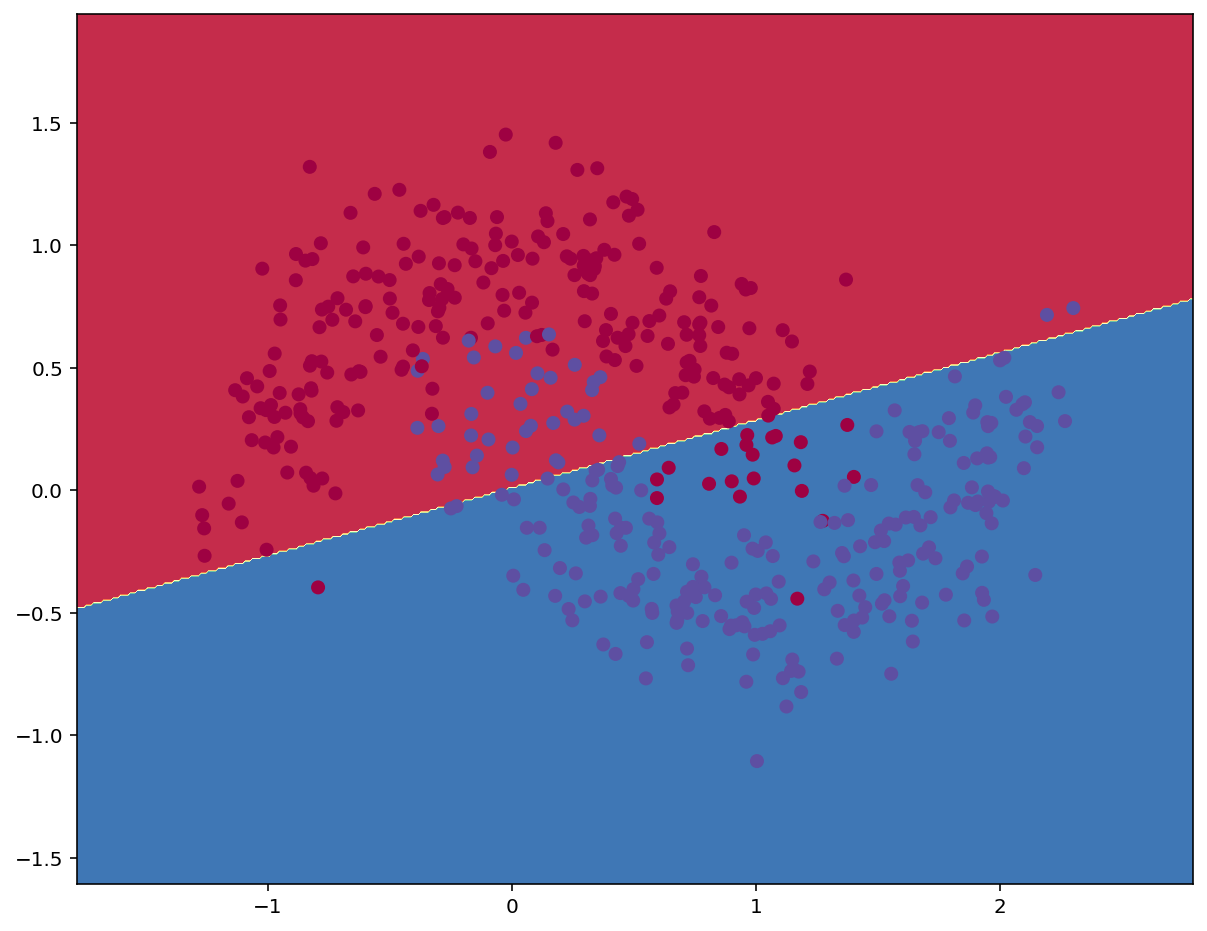

In [8]:
# Function to define a linear model
def predLinear(x,a,b):
    yvalues = a*x[:,0]+b
    return np.where(x[:,1]>yvalues, 0, 1)

#create range to test for a and b values
arange = np.linspace(-5,5,200)
brange = np.linspace(-1.5,1.5,200)

#set values to change using loop for accuracy, a and b
amax = 0
ause = 0
buse = 0

#loop through values of a and b and pass through function
#replace amax, ause and buse if new value of accuracy is larger than existing value
for i, a in enumerate(arange):
    for j, b in enumerate(brange):
        avalue=(accuracy(lambda x: predLinear(x,a,b), X_test500,y_test500))
        if avalue>amax:
            amax = avalue
            ause = a
            buse = b

print(amax)
print(ause)
print(buse)

#plot boundary
plot_decision_boundary(lambda x: predLinear(x,ause,buse),X_test500,y_test500)

## Train a neural network
The boundary between the red and blue areas can be identified using a neural network, as discussed in the lecture earlier. The following helper functions lay out the calculation needed to evaluate the loss function, its derivatives and to find the parameters of the network. 

In [9]:
# These are parameter that are used in the training
# 
# 
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [10]:
# Calculate the value of the output layers a2
def calcProbsNN(model,x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    # This is the softmax function
    exp_scores = np.exp(z2)
    a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    
    return a2
    
# Helper function to predict an output (0 or 1)
def predict(model, x):
    probs = calcProbsNN(model,x)   
    return np.argmax(probs, axis=1)

In [11]:
# Helper function to evaluate the total loss on the dataset
# See notes from this morning lecture
# Given a model (eg W1, W2, b1 and b2) this functions calculates the value of the loss function
# This is not used to determine the parameters, to find the minimum of the loss function, we work with its derivatives
#
def calculate_loss(model,X,y):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    num_examples = len(X) # training set size
    probs = calcProbsNN(model,X)   
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [12]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - X is the data
# - y is the category for the test data
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, X, y ,num_passes=20000, print_loss=False):
    
    num_examples = len(X) # training set size
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # Define the model as a dictionary 
    # The parameters that define our network are these:
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}


    # Gradient descent method. This looks for a minimum of the loss function
    # 
    for i in range(0, num_passes):

        # Forward propagation. For each point calculate the probabilites a2
        # This is a repetition of calcProbsNN, as we need to store the values for use in the derivative
        # We want to keep build_model separate from calcProbsNN
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # Backpropagation 
        delta3 = a2
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model,X,y)))
    
    return model

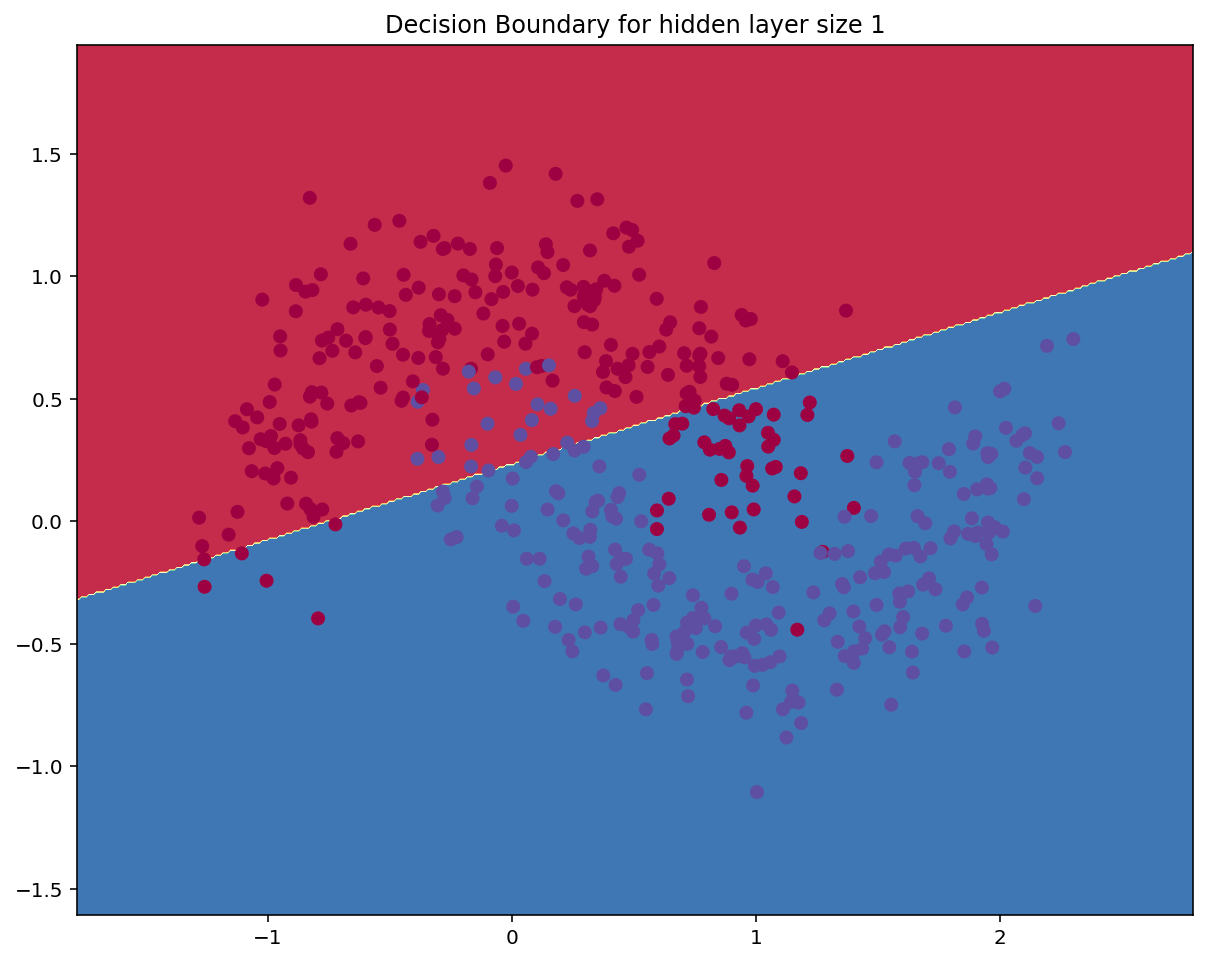

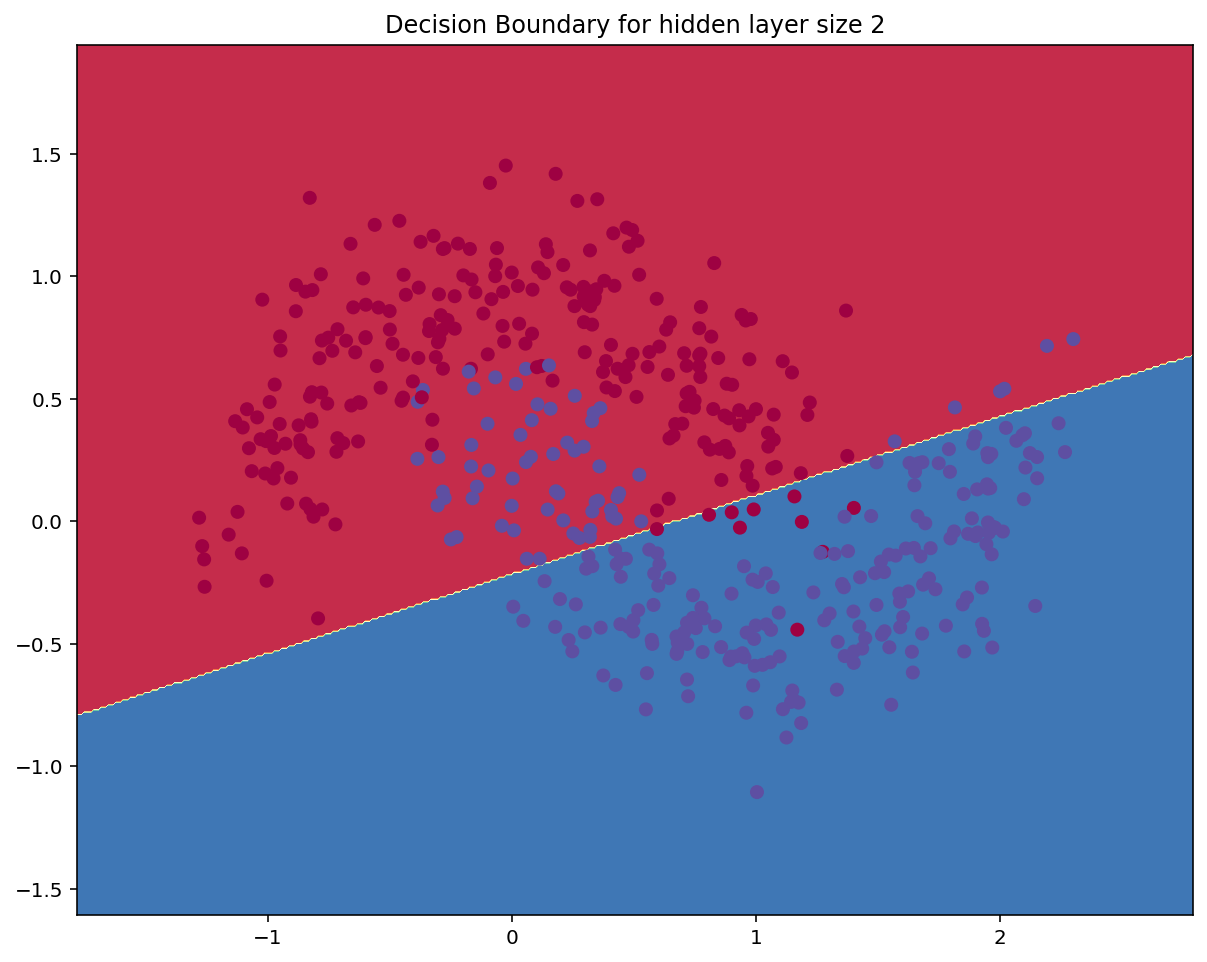

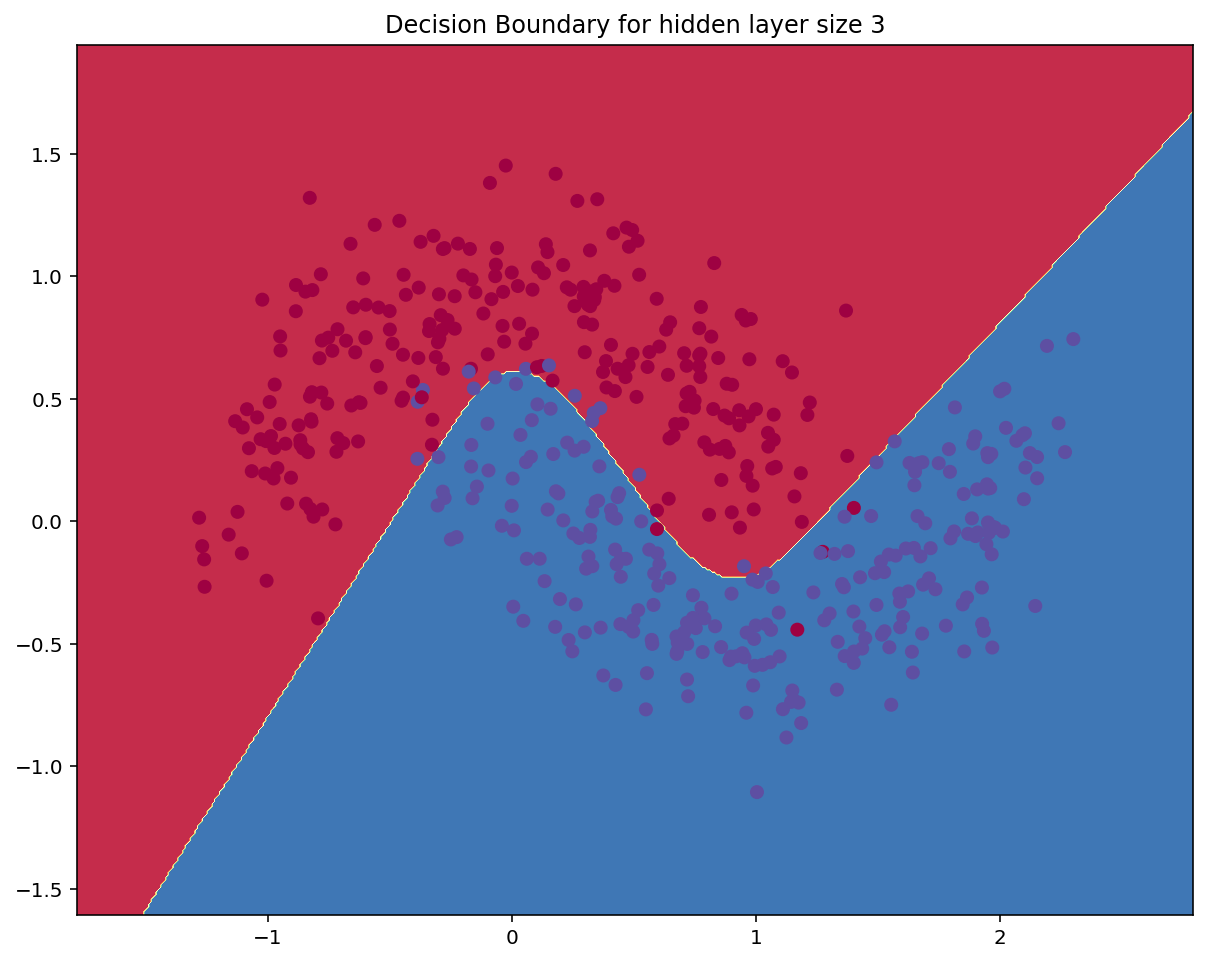

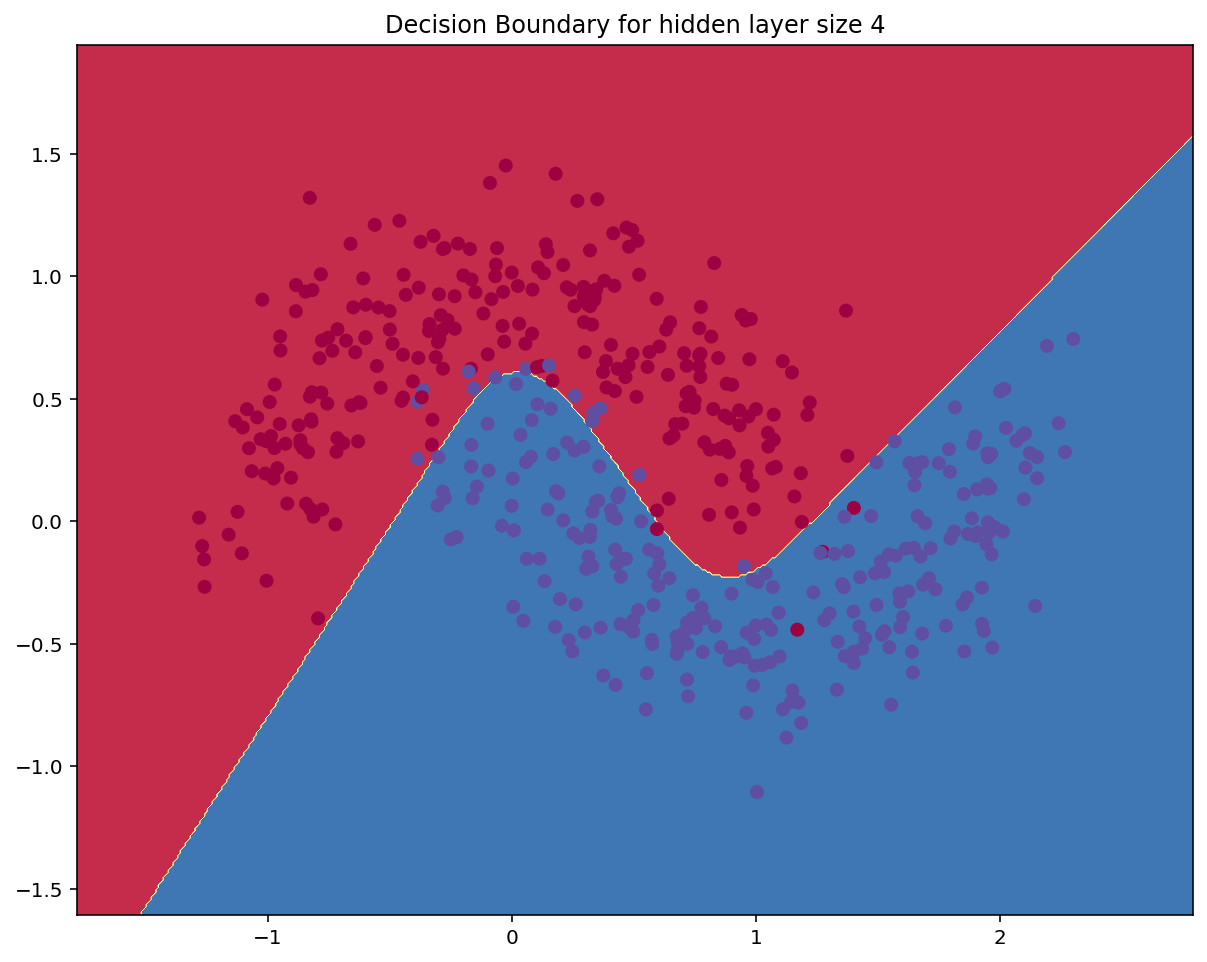

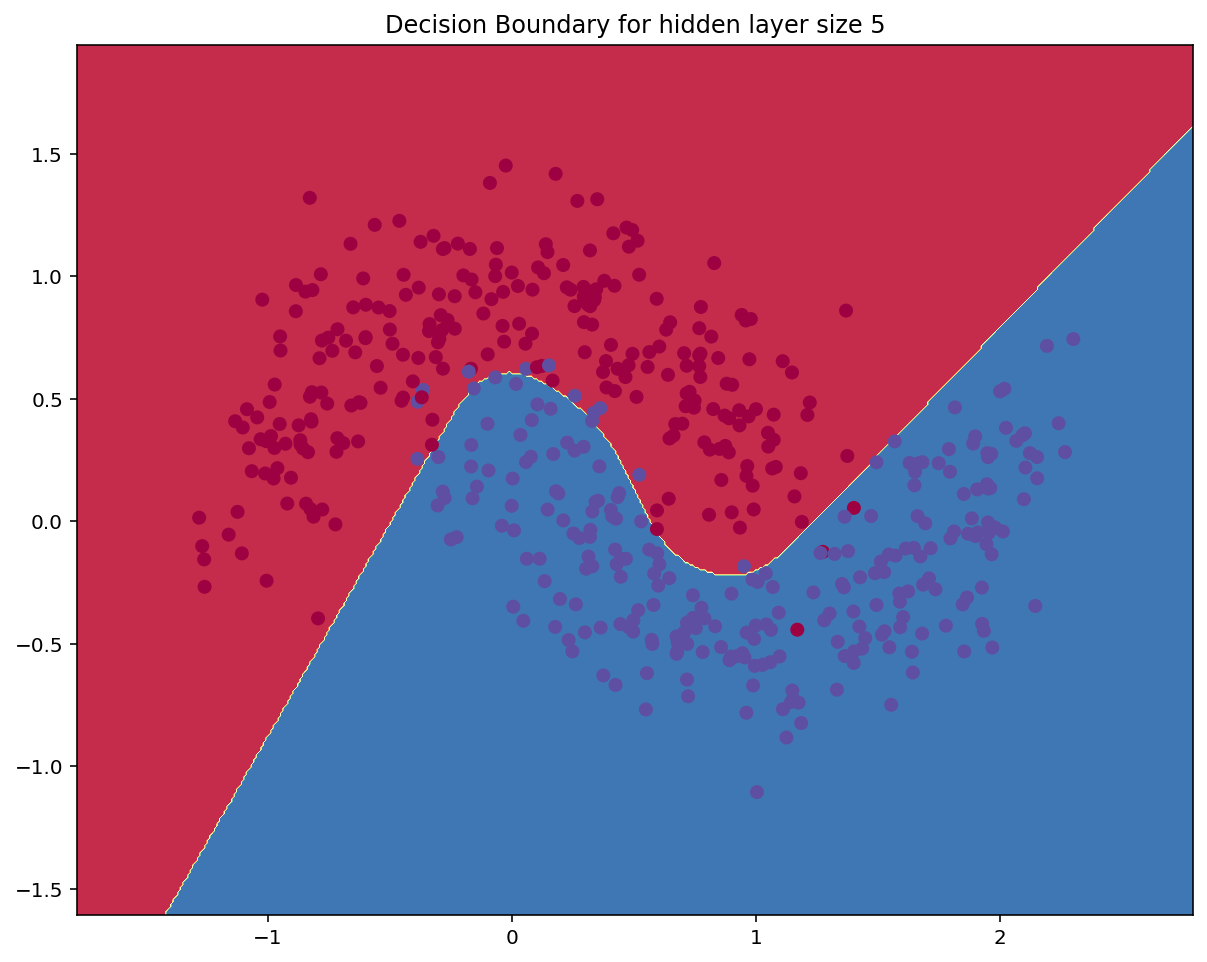

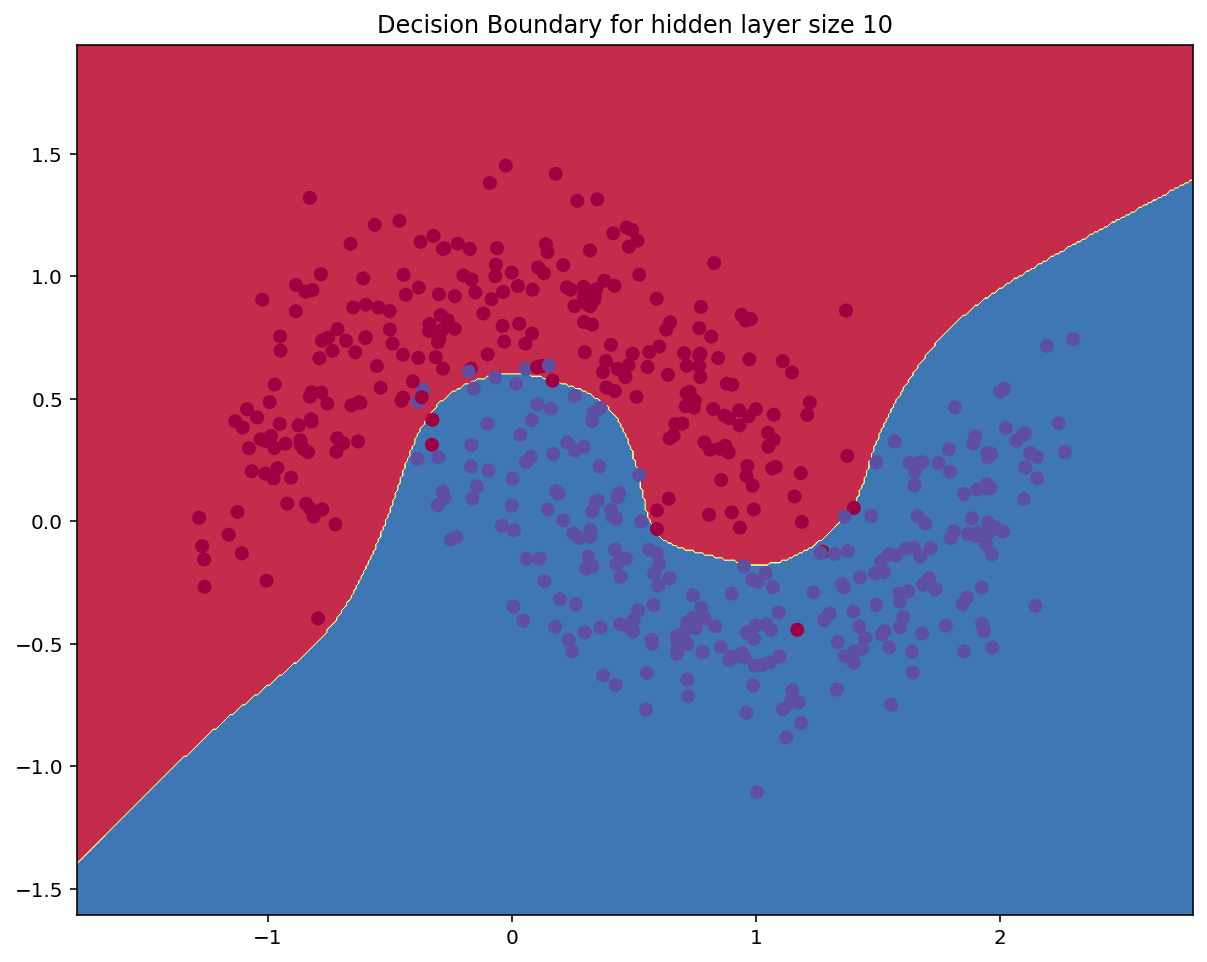

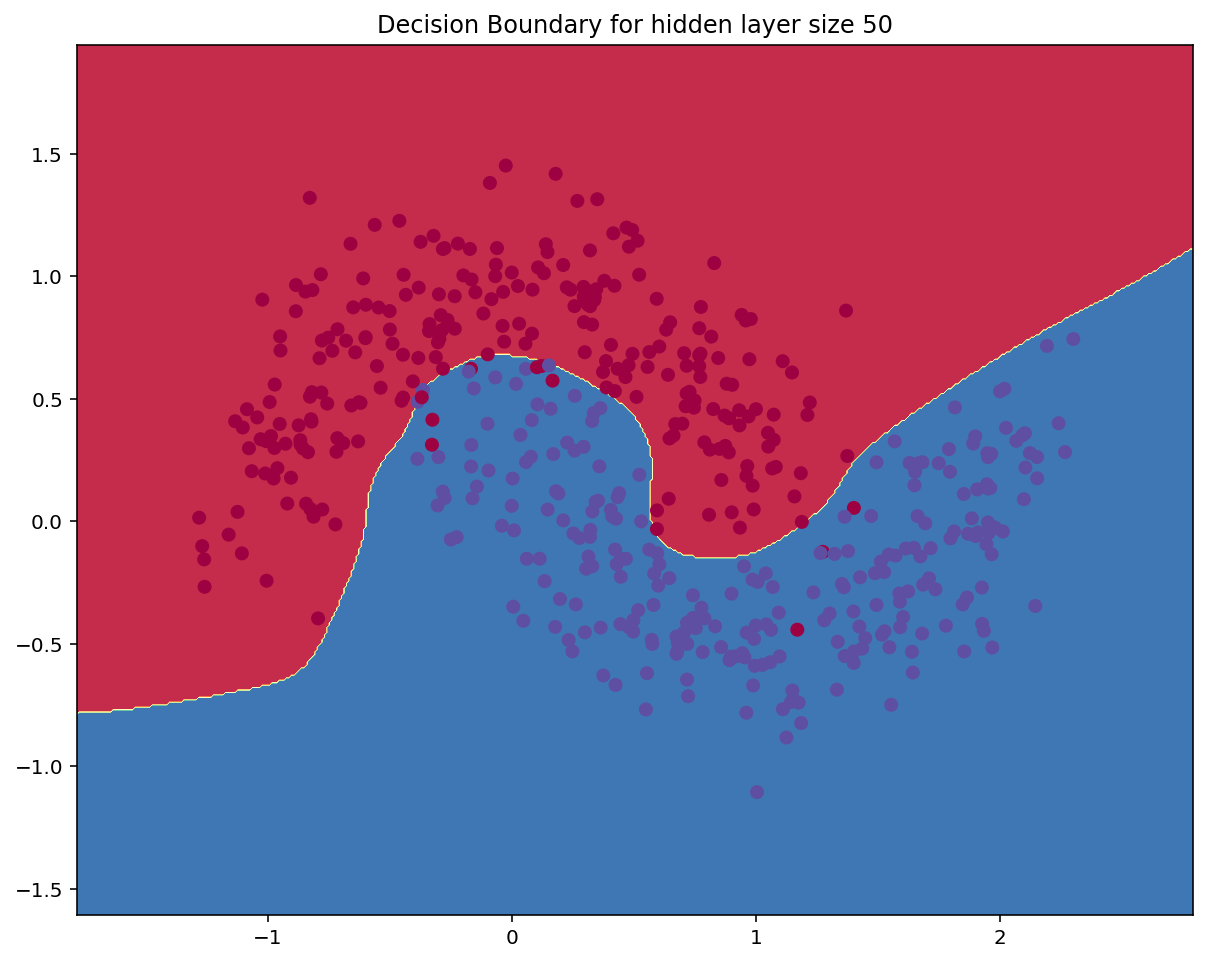

In [13]:
####Task 3####

#Create array of hidden layer sizes
layers=[1,2,3,4,5,10,50]
#empty list for accuracy measurements
accuracies=[]

#loop through different models with varying hidden layer sizes
#plot decision boundary for each
#add accuracy measurement for each to empty list
for i in layers:
    model = build_model(i, X_test500, y_test500, print_loss=False,num_passes=500)
    plot_decision_boundary(lambda x: predict(model, x),X_test500,y_test500)
    plt.title("Decision Boundary for hidden layer size {0}".format(i))
    plt.show()
    accuracies.append(accuracy(lambda x: predict(model,x), X_test500, y_test500))
    
import plotly.graph_objects as go

#plot table of layer size against accuracy
fig = go.Figure(data=[go.Table(header=dict(values=['Layer Size', 'Accuracy']),
                 cells=dict(values=[layers, accuracies]))
                     ])
fig.show()



In [14]:
####Task 4####

model = build_model(4, X_test500, y_test500, print_loss=False,num_passes=500)

W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
print("W1 Matrix",W1)
print("W2 Matrix",W2)
print("b1 ",b1)
print("b2 ",b2)

#x*W1 and b1/a*W2 and b2 must be able to be combined linearly to calculate z1/z2
#Change of shape of matrix due to activation function

W1 Matrix [[ 0.15445315  3.87927226 -4.91461429  3.95126325]
 [-0.69281964 -3.8358095  -3.43139998 -2.54825815]]
W2 Matrix [[-0.23977797  0.38597189]
 [-2.05025284  2.81043406]
 [-2.66262838  3.0824585 ]
 [-2.53486147  2.90466885]]
b1  [[-3.85511984 -4.63736833  2.86082529  1.82894707]]
b2  [[-0.08552787  0.08552787]]


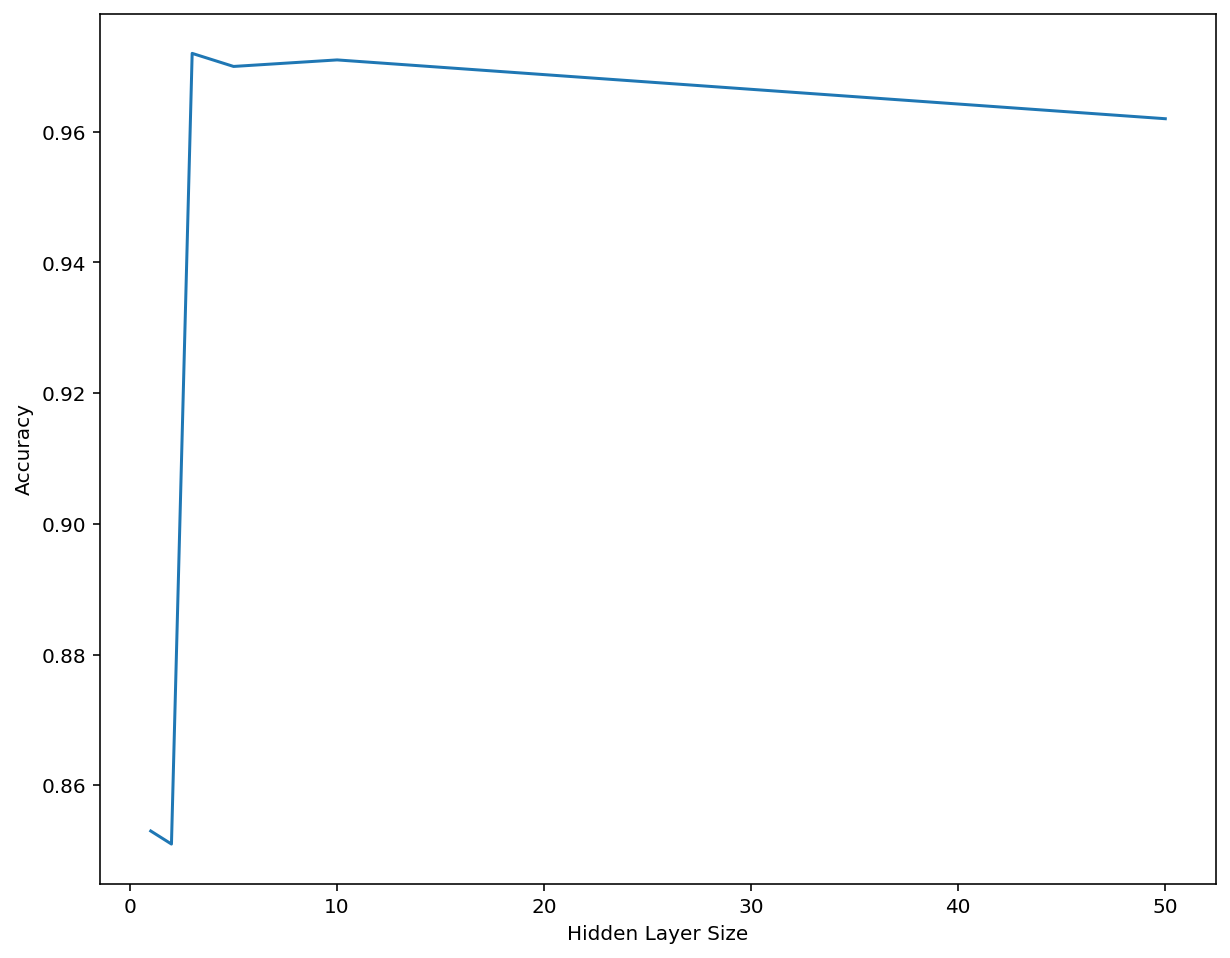

In [15]:
####Task 5####

# Generate a dataset and plot it
# We generate a new dataset with 1000 points and the default settings for the noise
#change randomness variable
X_test1000,y_test1000=generate_data(1000,2)



#empty list for accuracy measurements
acc = []

#loop over models with varying hidden layer sizes and test accuracy against test data
for i in layers:
    model = build_model(i,X_test500,y_test500, print_loss=False, num_passes=500)
    acc.append(accuracy(lambda X_test1000: predict(model,X_test1000),X_test1000,y_test1000))

plt.plot(layers,acc)
plt.title("Accuracy against hidden layer size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.show()

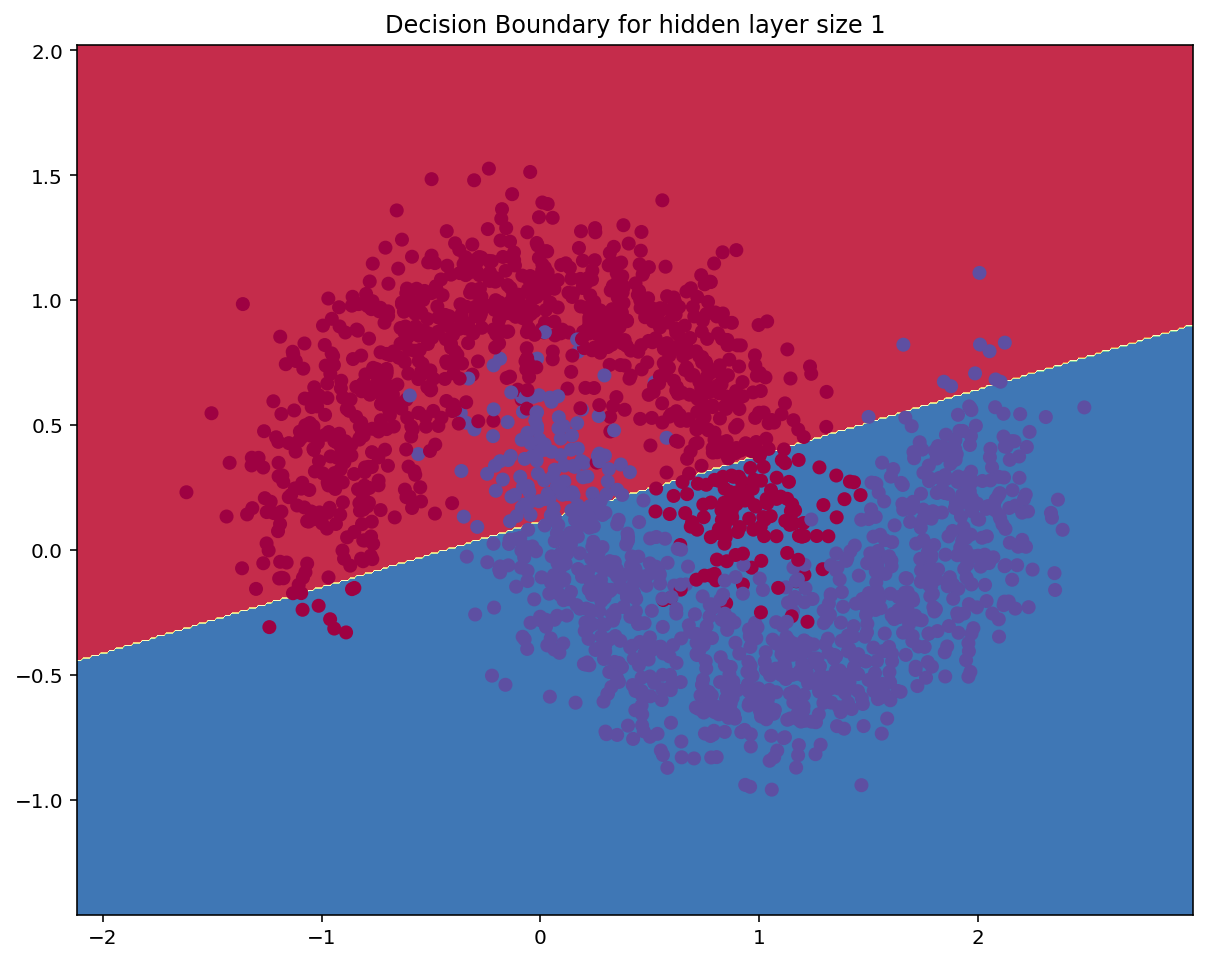

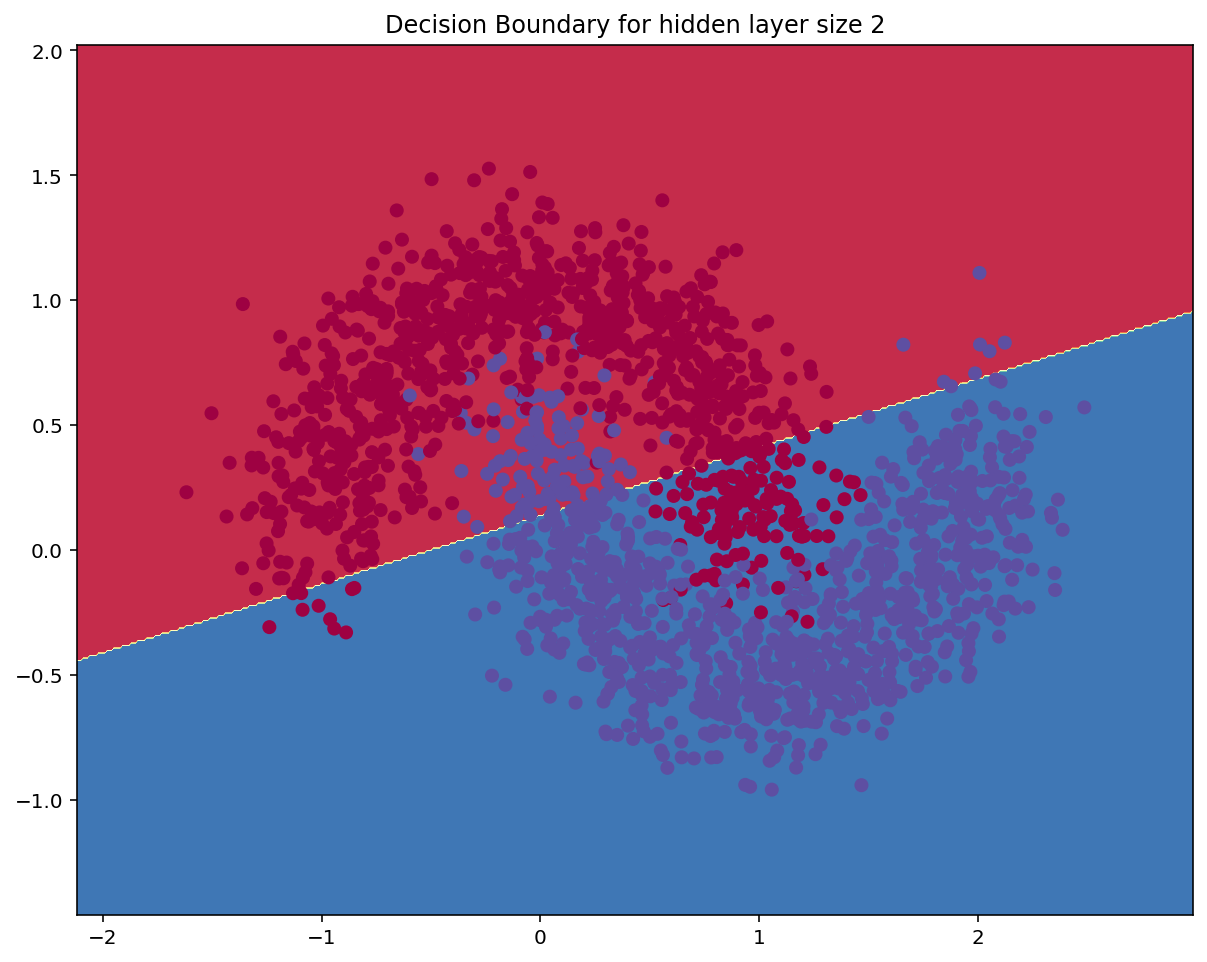

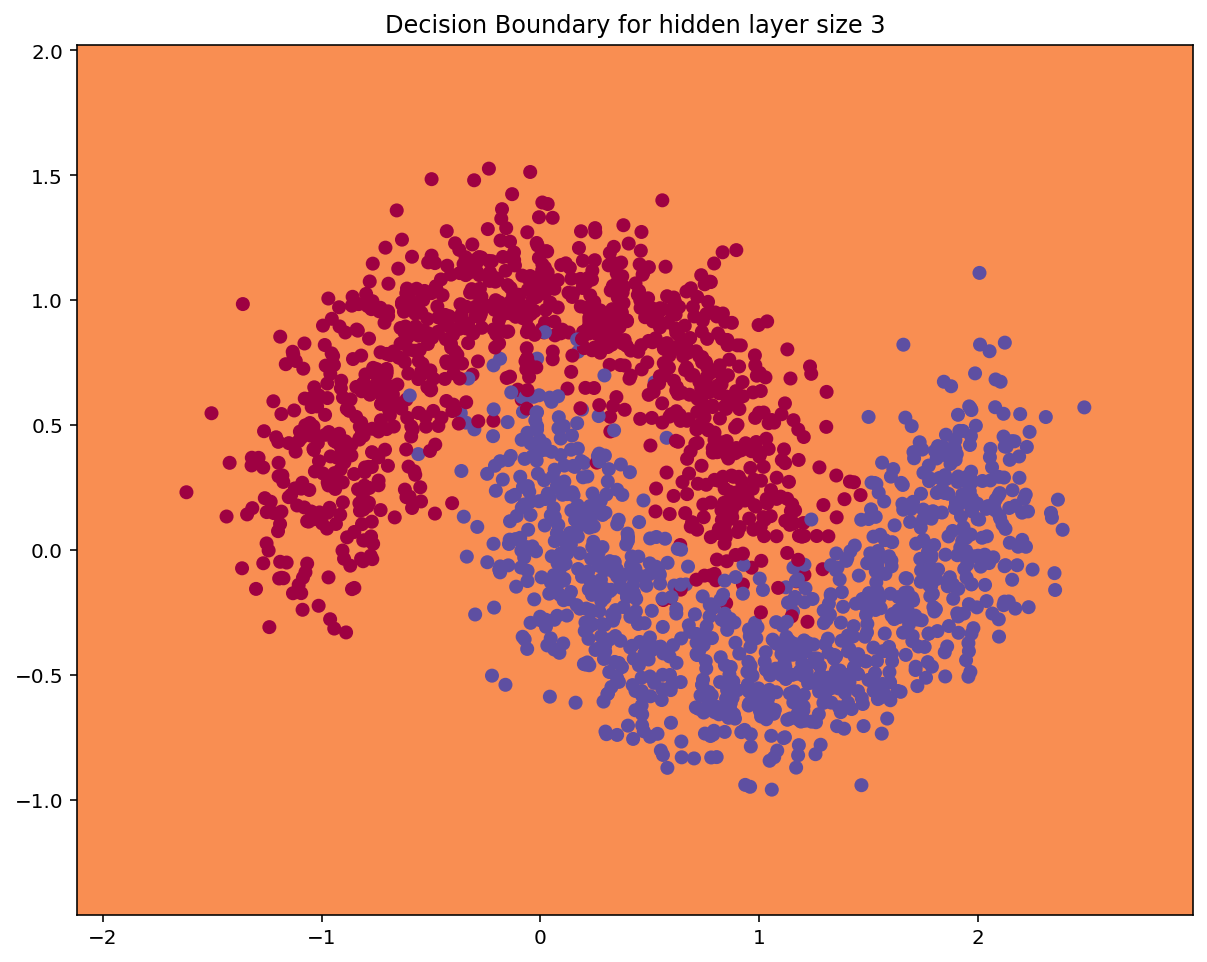

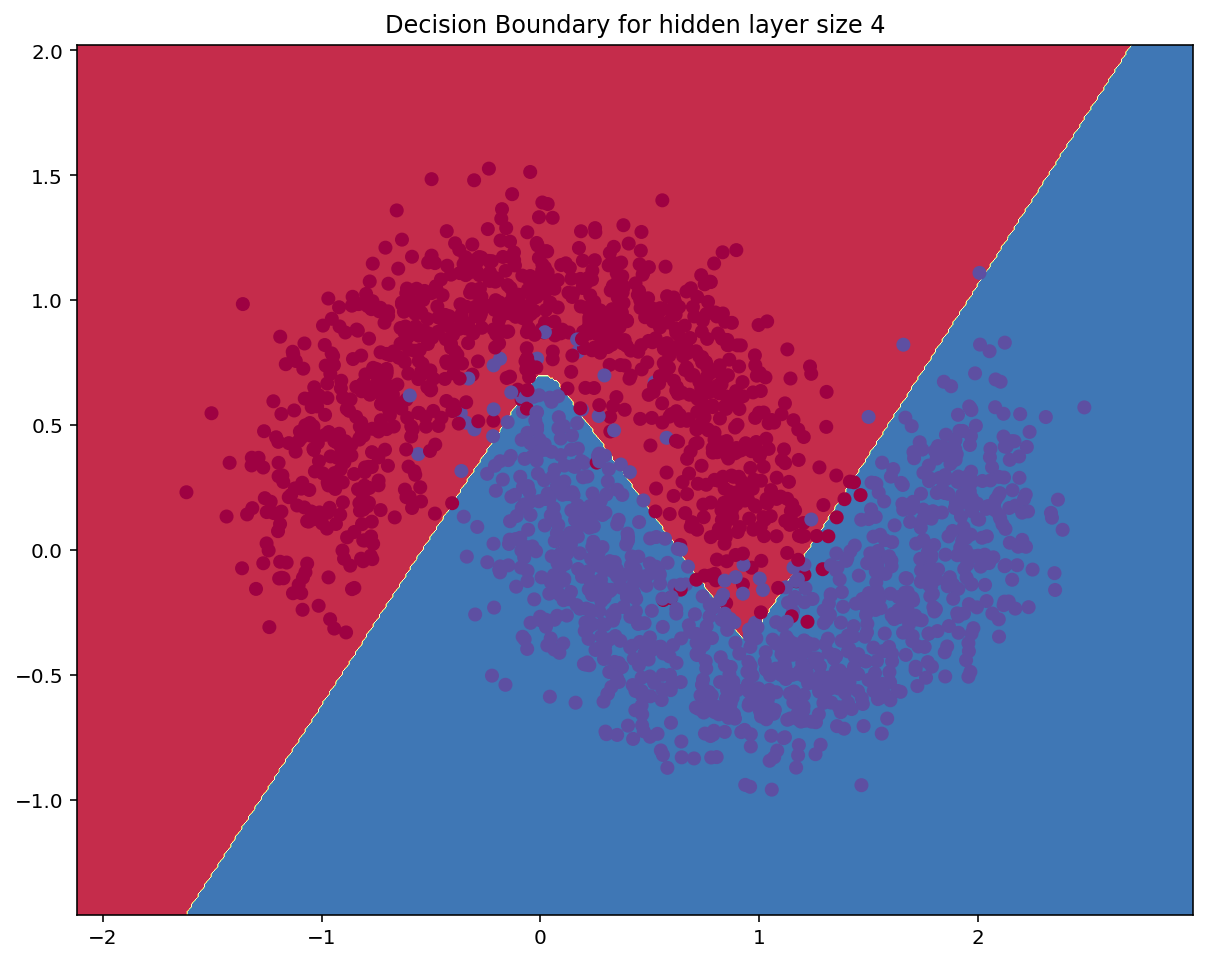

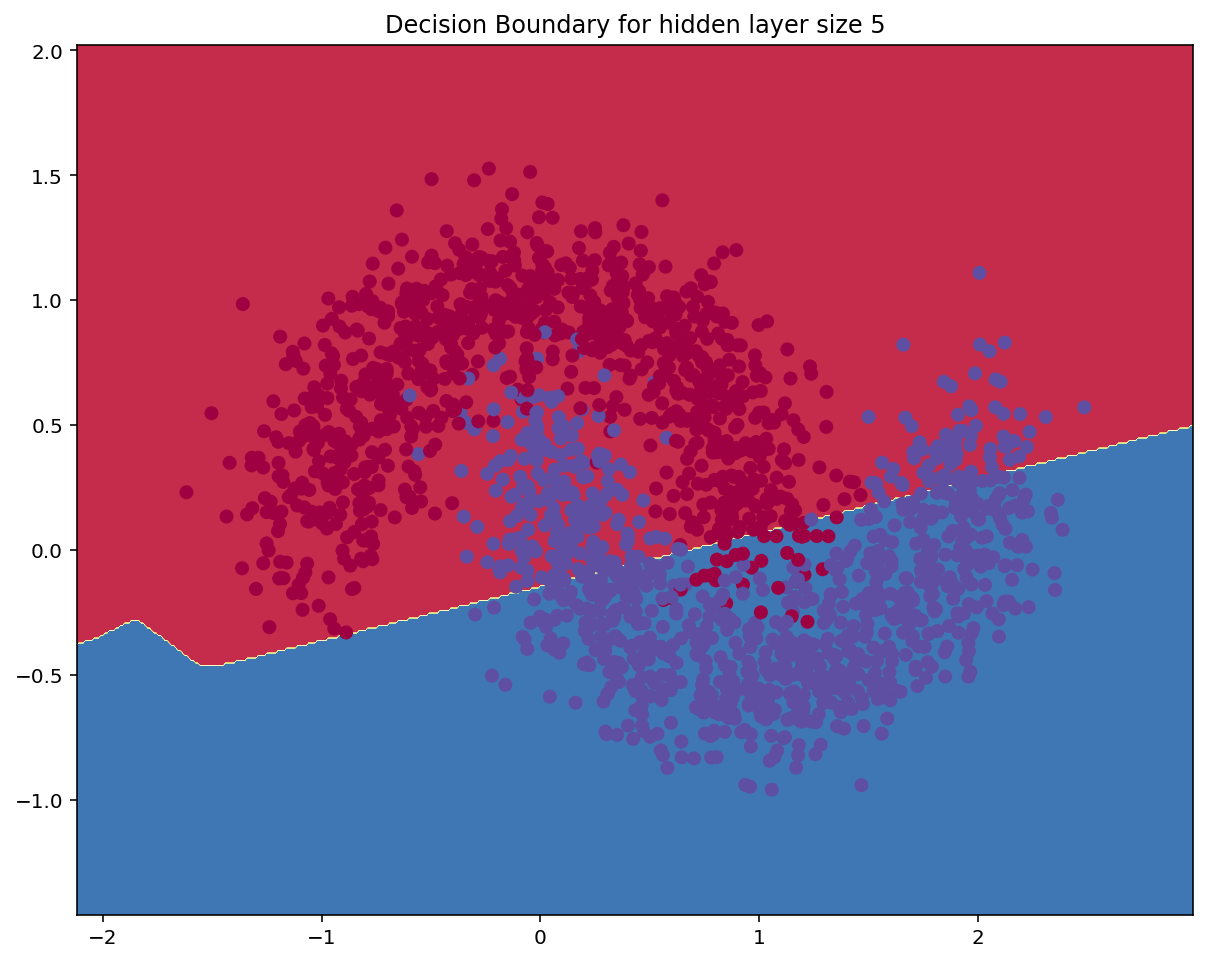

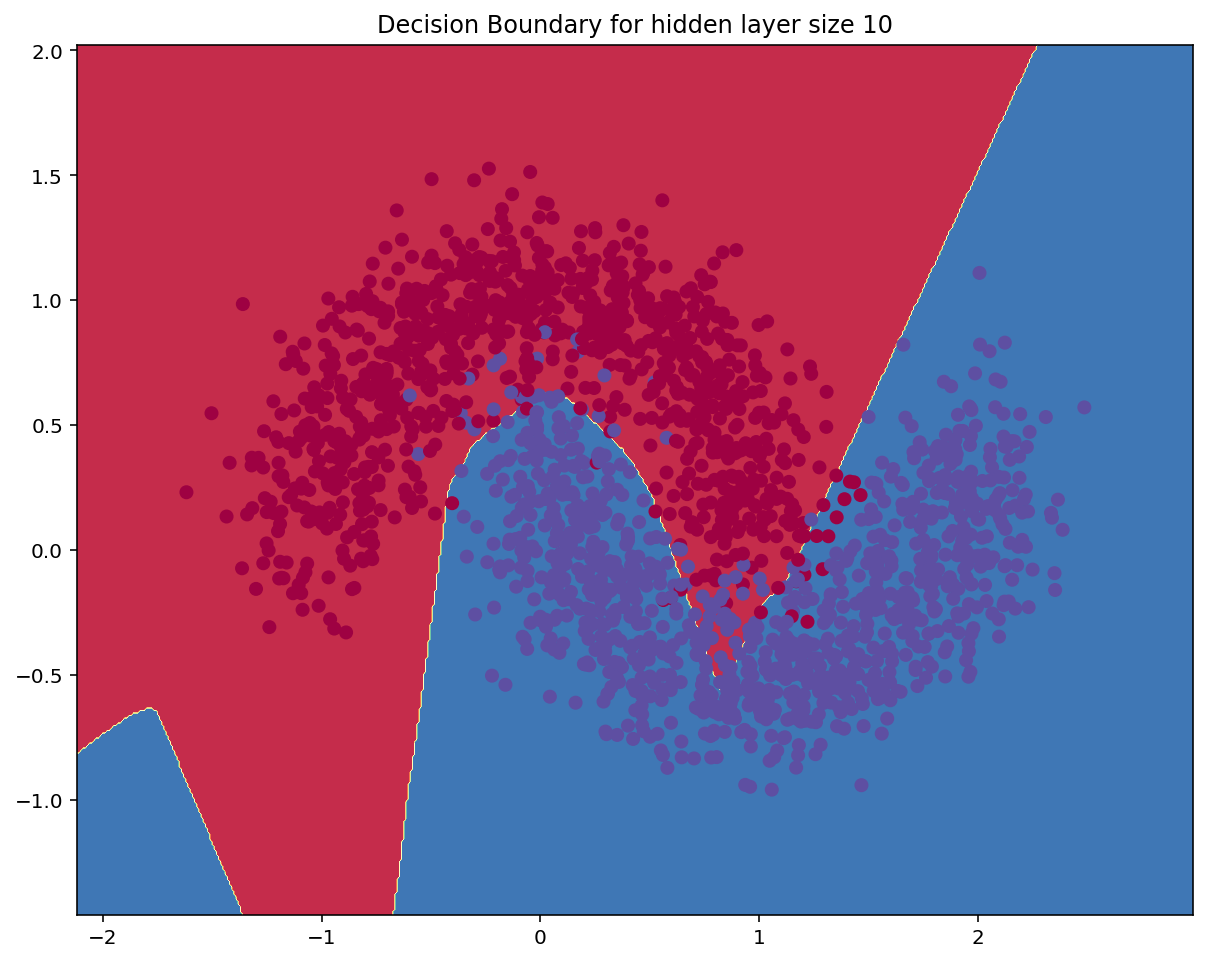

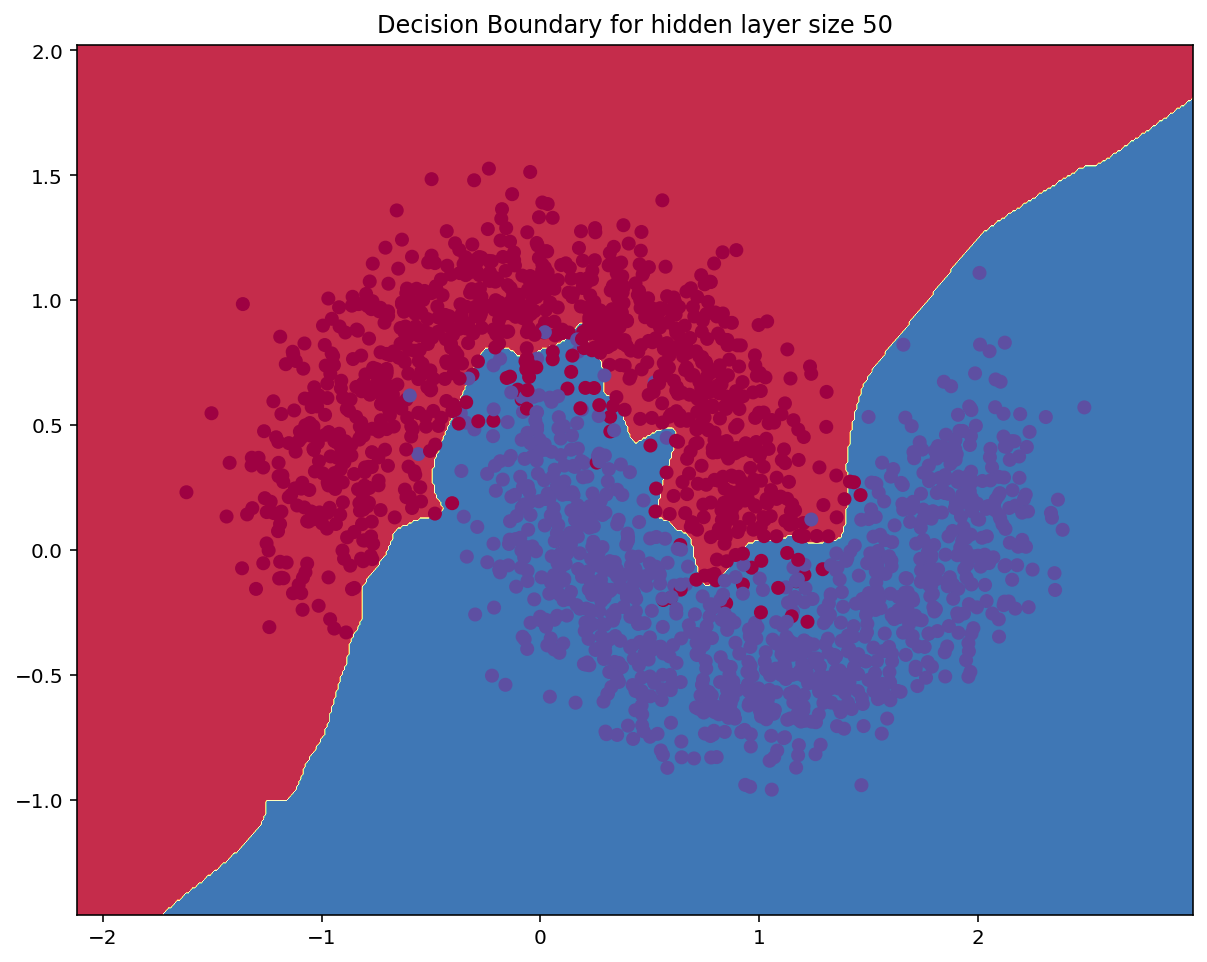

W1 Matrix [[ -2.89838364 -17.9854813   21.90568667 -26.59511691]
 [  3.10794975  13.32651752  17.99395717  19.45329138]]
W2 Matrix [[-6.01013114  6.13596046]
 [10.31993145 -9.66564232]
 [10.2522895  -9.89094108]
 [ 5.47833975 -5.16004597]]
b1  [[-13.67308781  -9.20751715 -13.32684437  32.47539635]]
b2  [[-5.6996021  5.6996021]]


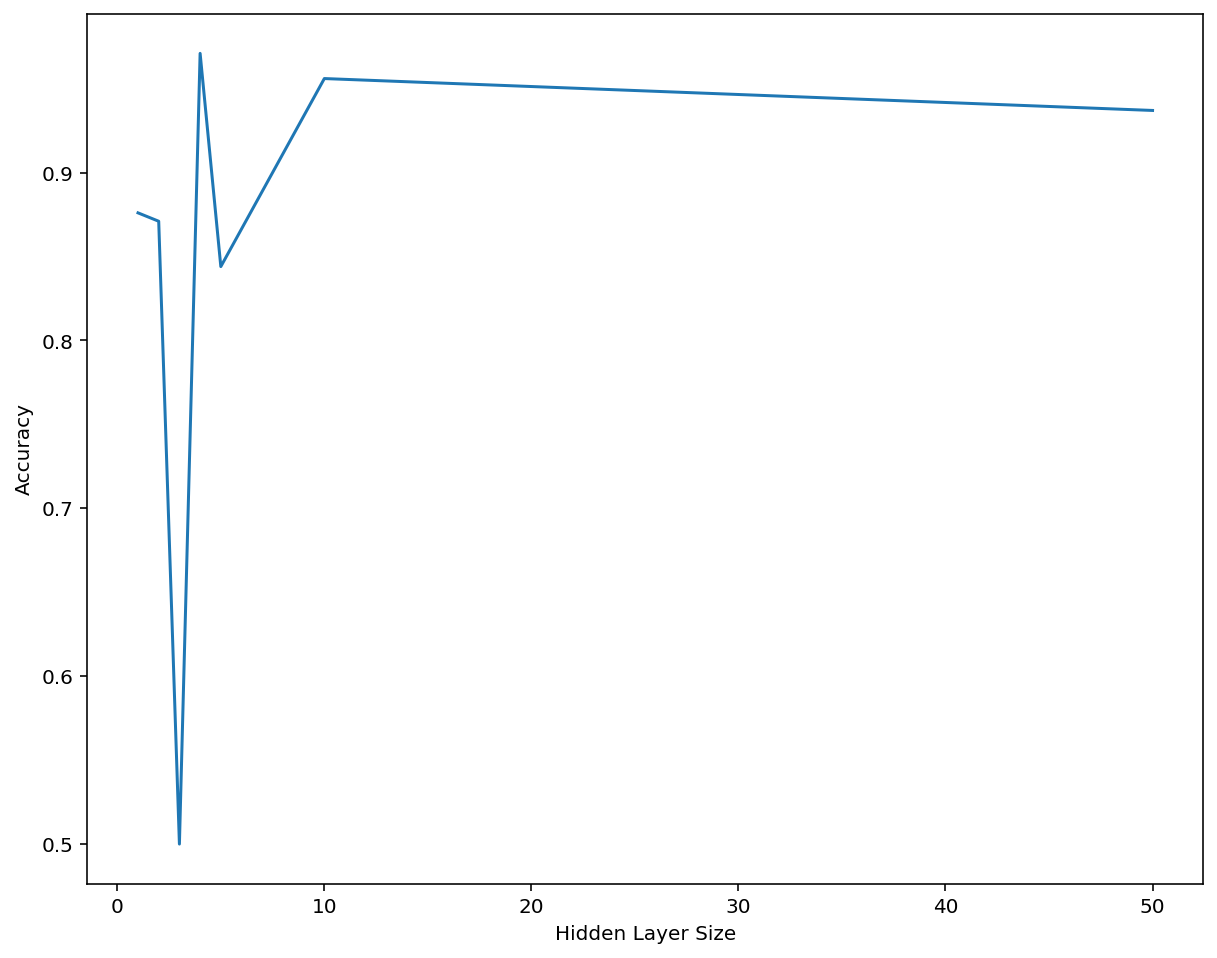

In [16]:
####Task 6####

#repeat exercise 3-5 with data set of 2000 points
#increase number of passes for increased number of events
accuracies=[]

X_test2000,y_test2000 = generate_data(2000)

for i in layers:
    model = build_model(i, X_test2000, y_test2000, print_loss=False,num_passes=2000)
    plot_decision_boundary(lambda x: predict(model, x),X_test2000,y_test2000)
    plt.title("Decision Boundary for hidden layer size {0}".format(i))
    plt.show()
    accuracies.append(accuracy(lambda x: predict(model,x), X_test2000, y_test2000))
    
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Layer Size', 'Accuracy']),
                 cells=dict(values=[layers, accuracies]))
                     ])
fig.show()

model = build_model(4, X_test2000, y_test2000, print_loss=False,num_passes=2000)

W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
print("W1 Matrix",W1)
print("W2 Matrix",W2)
print("b1 ",b1)
print("b2 ",b2)



acc2 = []

for i in layers:
    model = build_model(i,X_test2000,y_test2000, print_loss=False, num_passes=2000)
    acc2.append(accuracy(lambda X_test1000: predict(model,X_test1000),X_test1000,y_test1000))

plt.plot(layers,acc2, label="Model With 2000 Events")
plt.title("Accuracy against hidden layer size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.show()

In [17]:
####Task 7#####

#More outputs needed for further categories

#Rather than setting input and output dimensions as constant, include them in build function

#def build_model(nn_hdim,nn_input_dim, nn_output_dim, X, y ,num_passes, print_loss=True):

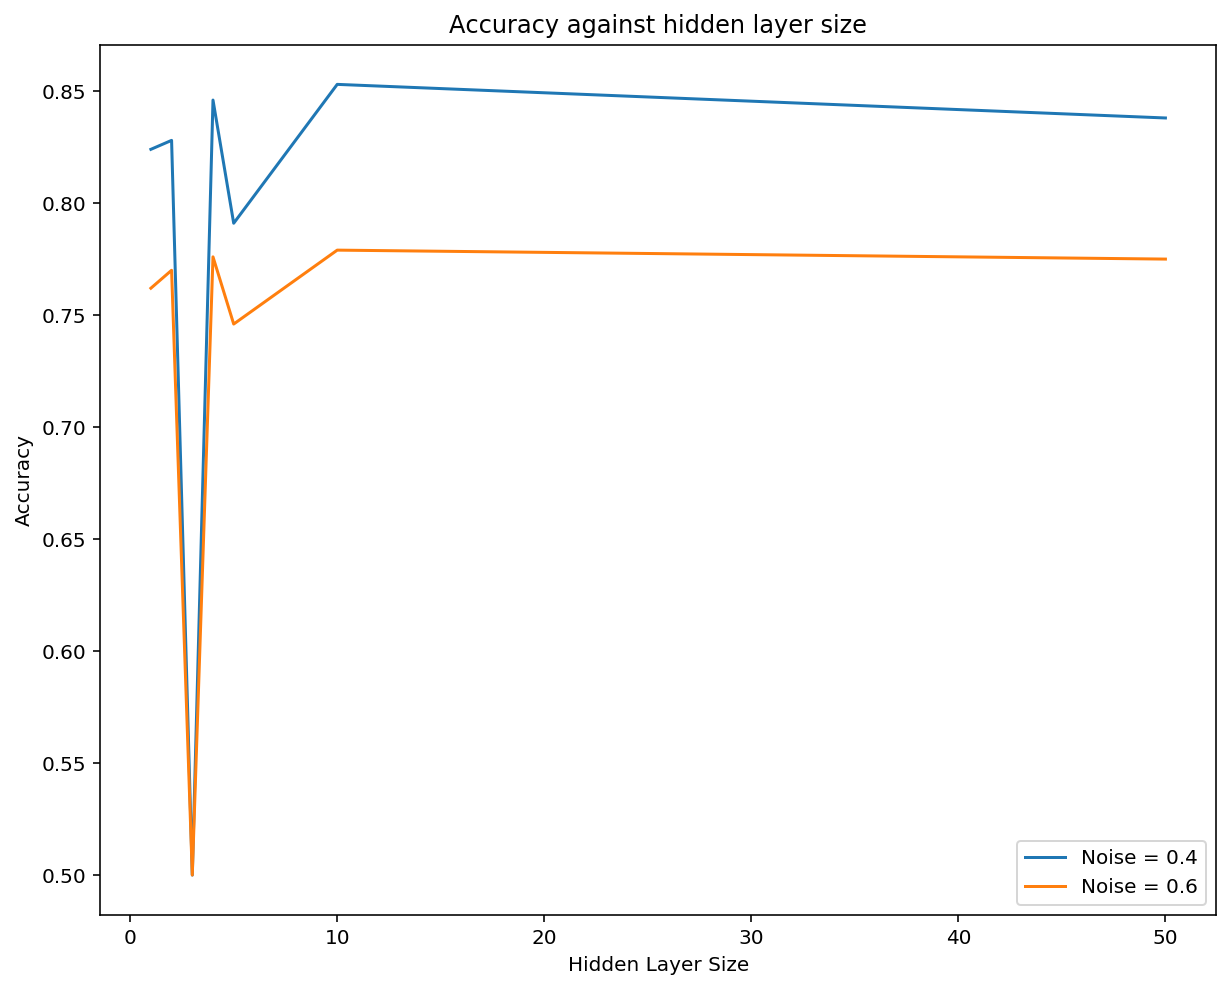

In [37]:
#### 4th Year Task 1 ####
#Generate test sets with different value of noise (0.4 and 0.6) and evaluate the efficiency using the model trained in exercise 5

#Repeat exercise 5 using 2000 events and test data with added noise
X_test2,y_test2=generate_data(1000,0,0.4)

acc = []
acc2 = []

for i in layers2:
    model = build_model(i,X_test2000,y_test2000, print_loss=False, num_passes=2000)
    acc.append(accuracy(lambda X_test2: predict(model,X_test2),X_test2,y_test2))
    
X2,Y2=generate_data(1000,0,0.6)
    
for i in layers2:
    model = build_model(i,X_test2000,y_test2000, print_loss=False, num_passes=2000)
    acc2.append(accuracy(lambda X2: predict(model,X2),X2,Y2))

plt.plot(layers2,acc, label = "Noise = 0.4")
plt.plot(layers2,acc2, label = "Noise = 0.6")
plt.title("Accuracy against hidden layer size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Loss is optimised at loop 278


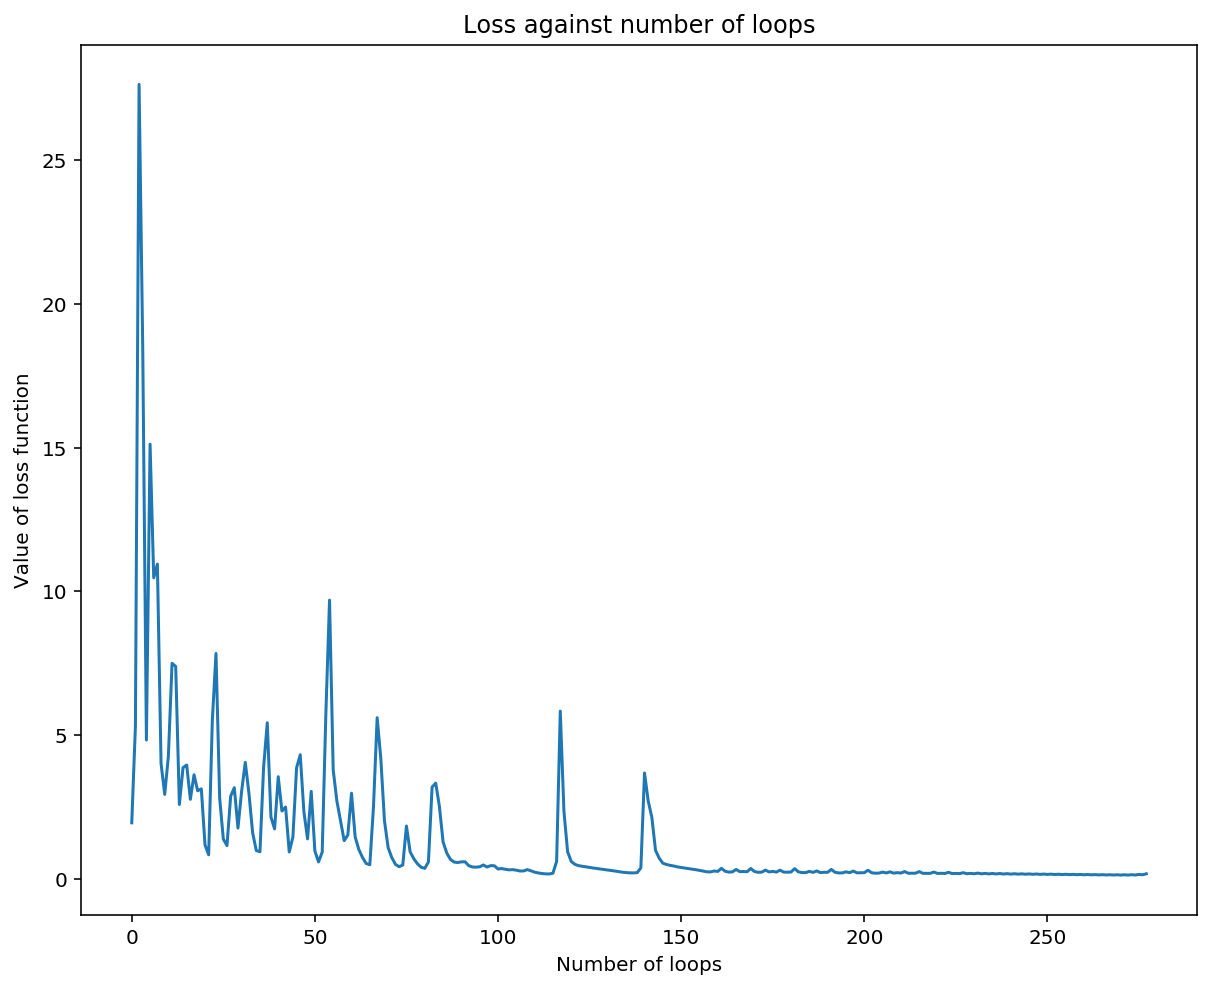

In [38]:
#### 4th Year Task 2 ####


def build_model2(nn_hdim, X, y ,num_passes=20000, print_loss=False):
    
    num_examples = len(X) 
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    #Create empty arrays for number of loops and loss
    loopnum = np.zeros(num_passes)
    lossnum = np.zeros(num_passes)


    # Gradient descent method. This looks for a minimum of the loss function
    for i in range(0, num_passes):

        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        

        delta3 = a2
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        lossnum[i]=calculate_loss(model,X,y)
        loop[i]=i
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model,X,y)))
        
        #Stop looping if difference between consecutive loss values is small
        if abs(lossnum[i]-lossnum[i-1])<0.0001:
            print("Loss is optimised at loop", i)
            break
    
    return model, i, loopnum, lossnum


#Plot number of loops against loss value
modelnew, num, loop, loss = build_model2(4,X_test2000,y_test2000,print_loss=False,num_passes=2000)
loopvalues = np.arange(0,num)
plt.plot(loopvalues,loss[:num])
plt.title("Loss against number of loops")
plt.xlabel("Number of loops")
plt.ylabel("Value of loss function")
plt.show()


### Model building
This example code uses the helpers above to run a neural network with 3 hidden layers and lots the decision boundary and the accuracy

Loss after iteration 0: 0.358460


Accuracy 0.964


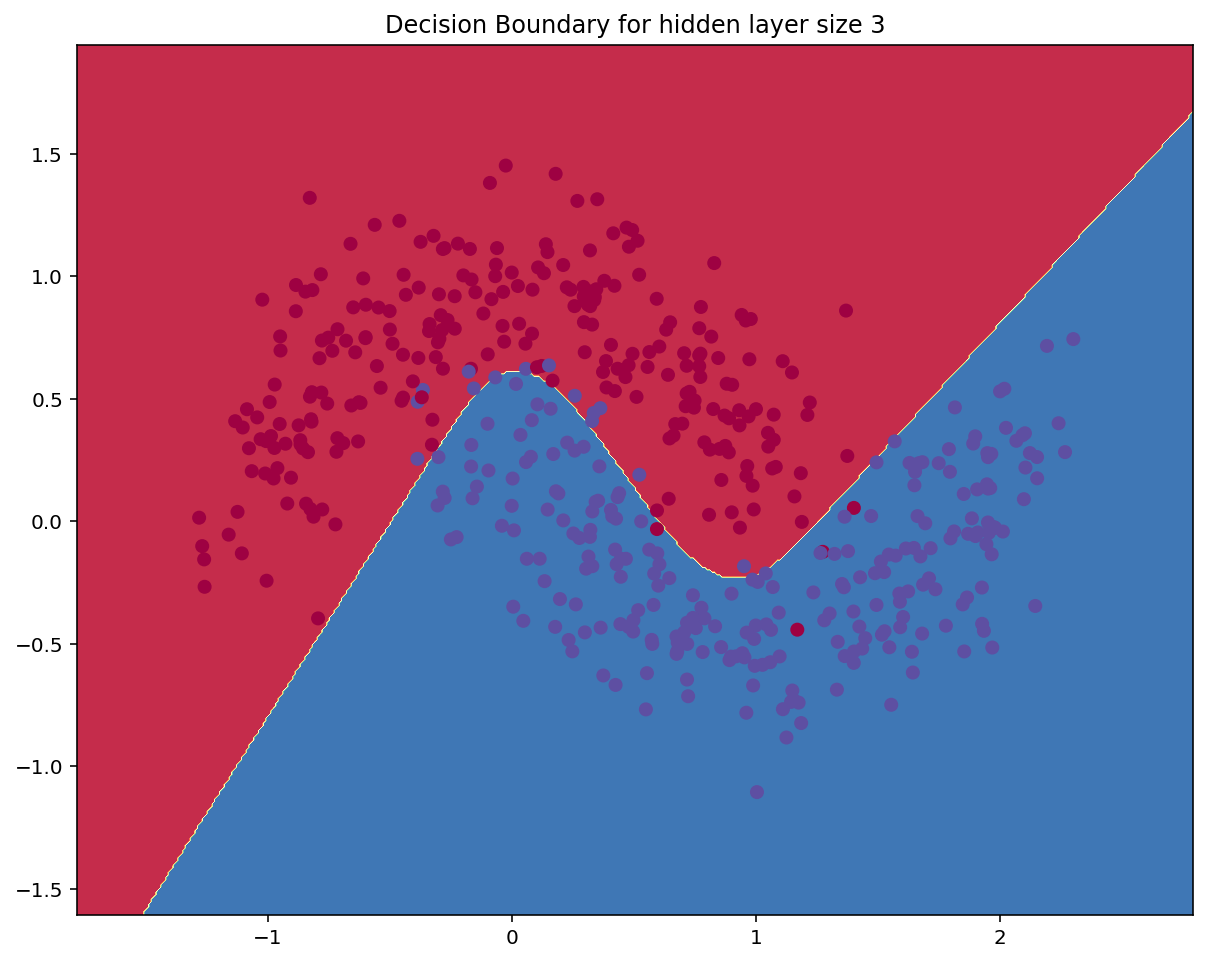

In [19]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, X_test500, y_test500, print_loss=True,num_passes=500)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x),X_test500,y_test500)
plt.title("Decision Boundary for hidden layer size 3")
print("Accuracy",accuracy(lambda x: predict(model,x), X_test500, y_test500) )


### Exercise 3
Use the code above to plot the boundaries for different sizes of the hidden layer (1, 2, 3, 4, 5, 10, 50). Evaluate the accuracy for each of the cases and report that as a table or as a graph

### Exercise 4
For the case with a hidden layer of dimension 4, print the matrices $W_1$, $W_2$ and the bias vectors $b_1$ and $b_2$ that are obtained at the end of the training. Comment on their dimensionality. 

### Exercise 5
Generate a "test data set" with 1000 points, which is statistically independent from the training set by using a different random seed. Evaluate the accuracy as a function of the hidden layer dimension on this test data set. **Note* the test data set should not be used for training

### Exercise 6
Repeat the exercises above using a larger training set of 2000 events. In particular evaluate the efficiency using the test set defined in exercise 5

### Exercise 7
How would you modify the code to classify elements with 3 or more categories? How would you modify the code to allow for more input parameters? Please provide a written description with code examples, but a full working code is not needed. The purpose of this exercise is for you to reflect on how to implement a more generic ANN, which we will use later in the course. 

### For PHY428. 
   * Generate test sets with different value of noise (0.4 and 0.6) and evaluate the efficiency using the model trained in exercise 5
   * Optimise the minimisation of the loss function. Plot the value of the loss function vs the loop number and find a way to optimise the number of loops by stopping when a given a 

